# Data preprocessing

Dataset: https://www.kaggle.com/datasets/mishra5001/credit-card
This data provide the data for the credit card. This includes the fraud and non-fraud cases.

We perform the data preprocessing such as fill the null feature. We adopt the oversampling method, SMOTENC, to generate the synthetic data. We also produce interaction features from the difference between correlation for the two cases.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC

In [2]:
df = pd.read_csv('application_data.csv')

In [3]:
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
df = df.drop(['SK_ID_CURR'], axis=1)

In [6]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

The data is highly imbalanced.

# Data preprocessing

Convert the text in categorical features into integer

In [7]:
text_feature = list(df.select_dtypes(include=['object']).columns)

In [8]:
for i in text_feature:
    df[i] = df[i].fillna('NULL')
    typefeature = df[i].value_counts().index
    typenum = len(typefeature)
    for j in range(0, typenum):
        df[i].replace(typefeature[j], j, inplace=True)

In [9]:
df[text_feature].head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,FONDKAPREMONT_MODE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,0,1,0,0,0,0,0,1,0,1,1,0,1,1,2,0
1,0,0,0,1,1,3,1,0,0,3,2,7,1,1,3,0
2,1,1,1,0,0,0,0,1,0,1,2,6,0,0,0,1
3,0,0,0,0,0,0,0,2,0,1,1,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,3,3,53,0,0,0,1


In [10]:
num_cols = list(df.select_dtypes(include=['float64']).columns)

In [11]:
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

In [12]:
cat_cols = list(df.select_dtypes(include=['int64']).columns)

In [13]:
for col in cat_cols:
    print(col, df[df[col].isnull()][col].shape[0])

TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
NAME_TYPE_SUITE 0
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_ID_PUBLISH 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 0
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
FONDKAPREMONT_MODE 0
HOUSETYPE_MODE 0
WALLSMATERIAL_MODE 0
EMERGENCYSTATE_MODE 0
FLAG_DOCUMENT_2 0
FLAG_DOCUMENT_3 0
FLAG_DOCUMENT_4 0
FLAG_DOCUMENT_5 0
FLAG_DOCUMENT_6 0
FLAG_DOCUMENT_7 0
FLAG_DOCUMENT_8 0
FLAG_DOCUMENT_9 0
FLAG_DOCUMENT_10 0
FLAG_DOCUMENT_11 0
FLAG_DOCUMENT_12 0
FLAG_DOCUMENT_13 0
FLAG_DOCUMENT_14 0
FLAG_DOCUMENT_15 0
FLAG_DOCUMENT_16 0


No missing data in categorical features.

In [14]:
numerical_feature = []
for col in cat_cols:
    if len(df[col].value_counts().index)>10:
        print(col, len(df[col].value_counts().index))
        numerical_feature.append(col)

CNT_CHILDREN 15
DAYS_BIRTH 17460
DAYS_EMPLOYED 12574
DAYS_ID_PUBLISH 6168
OCCUPATION_TYPE 19
HOUR_APPR_PROCESS_START 24
ORGANIZATION_TYPE 58


In [15]:
for i in numerical_feature:
    cat_cols.remove(i)
    
cat_cols.remove('TARGET')

In [16]:
num_cols += numerical_feature

Remove the redundant categorical features where one class is dominant

In [17]:
redundant_cat = []
size = df.shape[0]
for col in cat_cols:
    max_cat = df[col].value_counts().sort_values(ascending=False).iloc[0]
    if max_cat/size > .98:
        print(col, max_cat)
        redundant_cat.append(col)

FLAG_MOBIL 307510
FLAG_CONT_MOBILE 306937
REG_REGION_NOT_LIVE_REGION 302854
FLAG_DOCUMENT_2 307498
FLAG_DOCUMENT_4 307486
FLAG_DOCUMENT_5 302863
FLAG_DOCUMENT_7 307452
FLAG_DOCUMENT_9 306313
FLAG_DOCUMENT_10 307504
FLAG_DOCUMENT_11 306308
FLAG_DOCUMENT_12 307509
FLAG_DOCUMENT_13 306427
FLAG_DOCUMENT_14 306608
FLAG_DOCUMENT_15 307139
FLAG_DOCUMENT_16 304458
FLAG_DOCUMENT_17 307429
FLAG_DOCUMENT_18 305011
FLAG_DOCUMENT_19 307328
FLAG_DOCUMENT_20 307355
FLAG_DOCUMENT_21 307408


In [18]:
df = df.drop(redundant_cat, axis=1)
for i in redundant_cat:
    cat_cols.remove(i)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 101 entries, TARGET to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(36)
memory usage: 237.0 MB


In [20]:
feature = list(df.columns)
feature.remove('TARGET')

Split the data into train and test set

In [21]:
X = df[feature]
y = df['TARGET']

In [22]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=21)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.1, random_state=21)

Scale the numerical features

In [23]:
scaler = StandardScaler()

In [24]:
def transform_func(data, feature, transform, mode=0):
    if mode == 0:
        temp = transform.fit_transform(data[feature])
    elif mode == 1:
        temp = transform.transform(data[feature])
    transformed_data = pd.DataFrame(temp)
    transformed_data.columns = feature
    transformed_data.index = data.index
    return transformed_data, transform

In [25]:
train_X_std, scaler = transform_func(train_X, num_cols, scaler, mode=0)
val_X_std, _ = transform_func(val_X, num_cols, scaler, mode=1)
test_X_std, _ = transform_func(test_X, num_cols, scaler, mode=1)

In [26]:
train_X_std = pd.concat([train_X_std, train_X[cat_cols]], axis=1)
test_X_std = pd.concat([test_X_std, test_X[cat_cols]], axis=1)
val_X_std = pd.concat([val_X_std, val_X[cat_cols]], axis=1)

# Oversampling

In [27]:
num_size = len(num_cols)
tot_size = train_X_std.shape[1]

In [28]:
smote = SMOTENC(categorical_features=list(range(num_size,tot_size)), sampling_strategy='minority', random_state=21)

In [29]:
resampled_X, resampled_y = smote.fit_resample(train_X_std, train_y)

# Correlation

Correlation between numerical features for TARGET = 1

<AxesSubplot:>

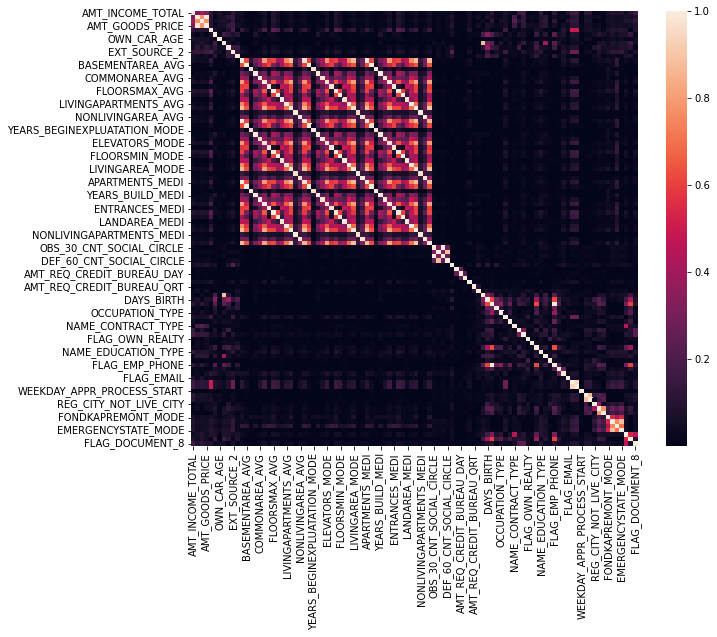

In [30]:
temp = pd.concat([train_y, resampled_X], axis=1)
temp = temp[temp.TARGET==1].drop(['TARGET'], axis=1)
corr1 = temp.corr().fillna(0.0)

plt.figure(figsize=(10,8))
sns.heatmap(corr1.abs())

Correlation between numerical features for TARGET = 0

<AxesSubplot:>

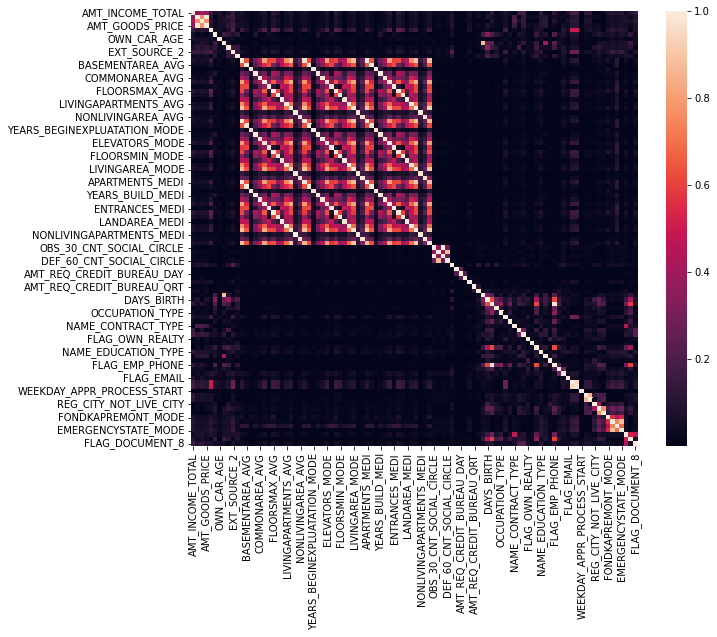

In [31]:
temp = pd.concat([train_y, resampled_X], axis=1)
temp = temp[temp.TARGET==0].drop(['TARGET'], axis=1)
corr0 = temp.corr().fillna(0.0)

plt.figure(figsize=(10,8))
sns.heatmap(corr0.abs())

Difference of correlation between two cases

<AxesSubplot:>

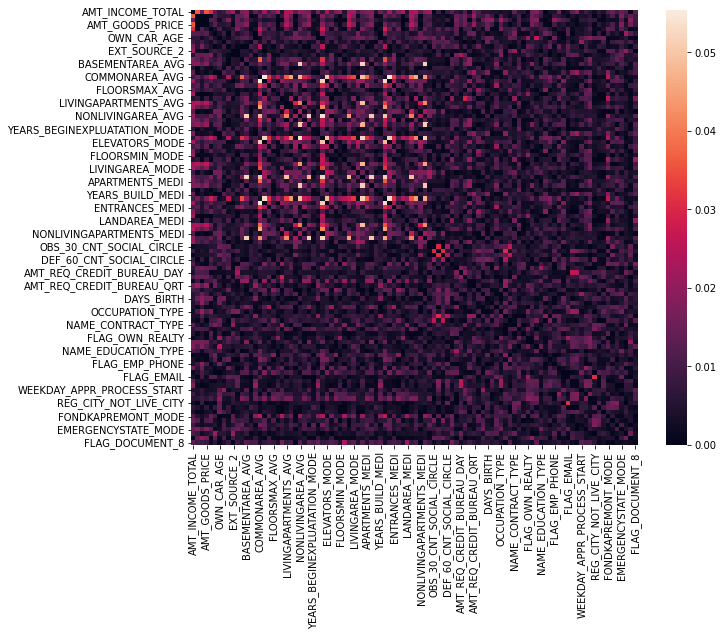

In [32]:
diffcorr = corr0 - corr1

plt.figure(figsize=(10,8))
sns.heatmap(diffcorr.abs())

In [33]:
threshold = 0.04
corr_pair = []
for i in num_cols:
    temp_corr = diffcorr[i].abs().sort_values(ascending=False)
    if len(list(temp_corr[temp_corr>threshold].index))>0:
        for j in list(temp_corr[temp_corr>threshold].index):
            corr_pair.append((i,j))
            
order_pair = []
for pair in corr_pair:
    if pair[0] > pair[1]:
        order_pair.append((pair[1],pair[0]))
    else:
        order_pair.append(pair)

corr_pair = list(set(order_pair))        

Generate the interaction feature

In [35]:
for pair in corr_pair:
    name = pair[0] + ' * ' + pair[1]
    resampled_X[name] = resampled_X[pair[0]] * resampled_X[pair[1]]
    test_X_std[name] = test_X_std[pair[0]] * test_X_std[pair[1]]
    val_X_std[name] = val_X_std[pair[0]] * val_X_std[pair[1]]

In [36]:
resampled_X.to_csv('train_X.csv')
test_X_std.to_csv('test_X.csv')
val_X_std.to_csv('val_X.csv')
resampled_y.to_csv('train_y.csv')
test_y.to_csv('test_y.csv')
val_y.to_csv('val_y.csv')